In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

response = requests.get(url)
soup = BeautifulSoup(response.text,"html.parser")


In [4]:
header = soup.find_all('th')
headerList = []
for x in header:
    headerList.append(x.get_text(strip=True))
headerList = headerList[0:9]

In [6]:
d = soup.find('table')

data = []

for row in d.find_all('tr'):
    sampleList = []
    for td in row.find_all('td'):
        sampleList.append(td.get_text(strip=True))
    data.append(sampleList)

data.pop(0)
df = pd.DataFrame(data, columns = headerList)
df.head()

,Symbol,Security,SEC filings,GICSSector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,0000066740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989


In [8]:
def graph(top25, bottom25, title):
    top25list = []
    top25list.append(top25['GICSSector'].value_counts().index.tolist())
    top25list.append(top25['GICSSector'].value_counts().tolist())

    top25_dict = {}
    for i in range(len(top25list[0])):
        top25_dict[top25list[0][i]] = top25list[1][i]

    bottom25dlist = []
    bottom25dlist.append(bottom25d['GICSSector'].value_counts().index.tolist())
    bottom25dlist.append(bottom25d['GICSSector'].value_counts().tolist())
    bottom25d_dict = {}
    for i in range(len(bottom25dlist[0])):
        bottom25d_dict[bottom25dlist[0][i]] = bottom25dlist[1][i]

    for i in top25list[0]:
        if i not in bottom25d_dict.keys():
            bottom25d_dict[i] = 0

    for i in bottom25dlist[0]:
        if i not in top25_dict.keys():
            top25_dict[i] = 0

    # print(top25_dict)
    # print(bottom25d_dict)

    bar_sectors = []
    for i in sorted(top25_dict.keys()):
        bar_sectors.append(i)
    # print(bar_sectors)

    bar_top25 = []
    for i in bar_sectors:
        bar_top25.append(top25_dict[i])
    # print(bar_top25)

    bar_bottom25d = []
    for i in bar_sectors:
        bar_bottom25d.append(bottom25d_dict[i])
    # print(bar_bottom25d)

    n_groups = len(bar_sectors)

    index = np.arange(n_groups)
    bar_width = 0.25
    opacity = 0.8
    fig = plt.subplots(figsize=(20,6))
    rects1 = plt.bar(index, bar_top25, bar_width, alpha=opacity, color='tab:blue', label='Top25')

    rects2 = plt.bar(index + bar_width, bar_bottom25d, bar_width, alpha=opacity, color='firebrick', label='Bottom25')

    plt.xlabel('GICS Sector')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(index + bar_width, bar_sectors, rotation=15)
    plt.legend()

    plt.tight_layout()
    plt.show()

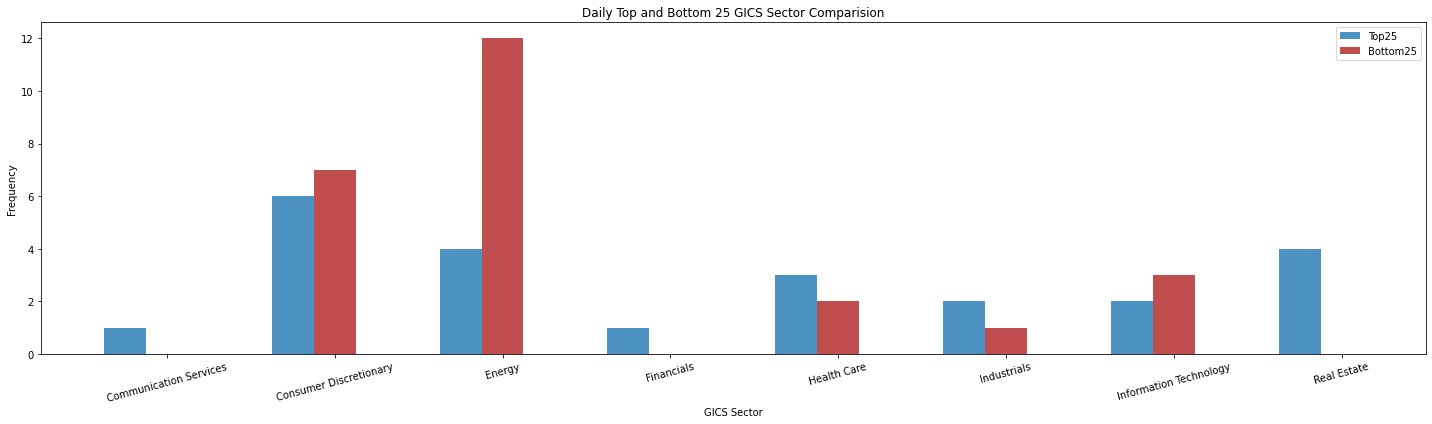

In [10]:
#Daily
csvd = pd.read_csv('Daily.csv')
csvd.drop(csvd.columns[[0,10,11,12]], axis = 1, inplace = True)
csvd.dropna(how='any', axis=0, inplace=True)
csvd.sort_values(['Gain or Loss'],inplace=True,ascending=False)

top25d = csvd.head(25)
top25d = top25d.merge(df, on='Symbol')
bottom25d = csvd.tail(25)
bottom25d = bottom25d.merge(df, on='Symbol')
graph(top25d, bottom25d, 'Daily Top and Bottom 25 GICS Sector Comparision')

C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


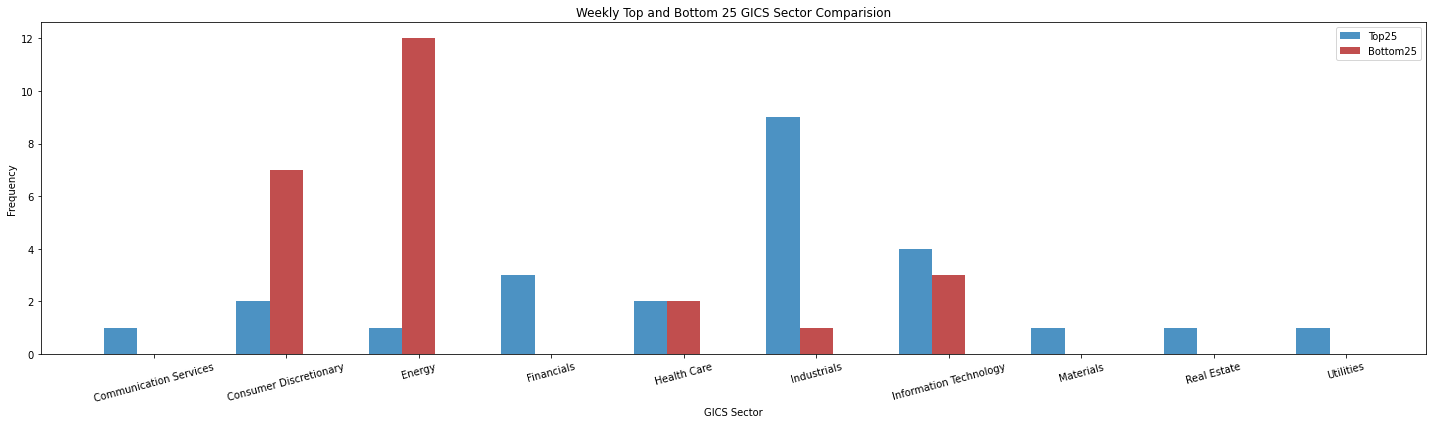

In [18]:
#Weekly
csvw = pd.read_csv('Weekly_with_g_or_l.csv')
csvw.drop(csvw.columns[[0,1,11,12,13]], axis = 1, inplace = True)
csvw.dropna(how='any', axis=0, inplace=True)
csvw.sort_values(['Gain or Loss'],inplace=True,ascending=False)

top25w = csvw.head(25)
top25w = top25w.merge(df, on='Symbol')
bottom25w = csvw.tail(25)
bottom25w = bottom25w.merge(df, on='Symbol')
graph(top25w, bottom25w, 'Weekly Top and Bottom 25 GICS Sector Comparision')

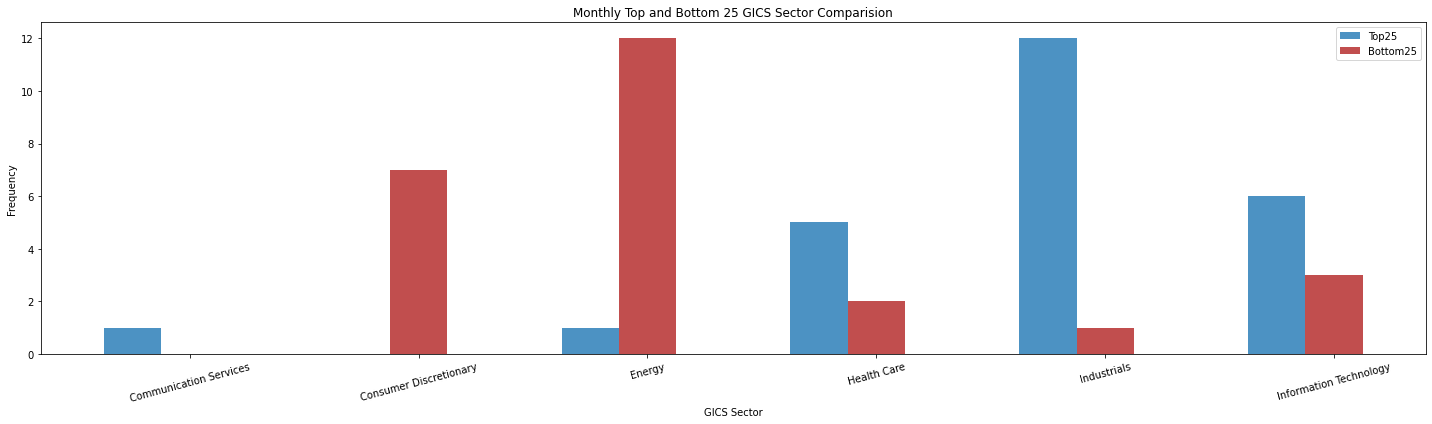

In [17]:
#Monthly
csvm = pd.read_csv('Monthly_with_g_or_l.csv')
# csvm.drop(csvm.columns[[0,1,11,12,13]], axis = 1, inplace = True)
csvm.drop(csvm.columns[[0,10,11,12]], axis = 1, inplace = True)
csvm.dropna(how='any', axis=0, inplace=True)
csvm.sort_values(['Gain or Loss'],inplace=True,ascending=False)

top25m = csvm.head(25)
top25m = top25m.merge(df, on='Symbol')
bottom25m = csvm.tail(25)
bottom25m = bottom25m.merge(df, on='Symbol')
graph(top25m, bottom25m, 'Monthly Top and Bottom 25 GICS Sector Comparision')